THE PROBLEM is to find a path from the start node to the end node over the 'mountains' where the highest point is as low as possible, i.e. 'the lowest pass over the mountains'.  In addition, this path is optimized so that the total path length is as short as possible through one of lowest high passes. (There may be several lowest high passages of the same height.)

MOTIVATION. The activation energy of a chemical reaction. Access route to the other side of the mountain range. Helicopter route in the mountains. In reverse, finding a shipping channel where the smallest depth is as large as possible.
       
ALGORITHM      
Copy graph G as residual graph RG.
Repeat until no new path is found:
*  Search graph RG for shortest path from start to finish.
*  If a NewPath path is found (= 'pth'):   
     - Find the highest edge (u1,v1) of this NewPath and its height ('pth_hi').
     - Remove this highest edge from graph RG. 
     - If this new highest edge is lower than than the already existing that
       of BestPath ('pth_hi0'),  update the BestPath 'pth0' and the hight of its highest edge 
       'pth_hi0'. 
*  If there is no new path, path0 is the solution path.
   

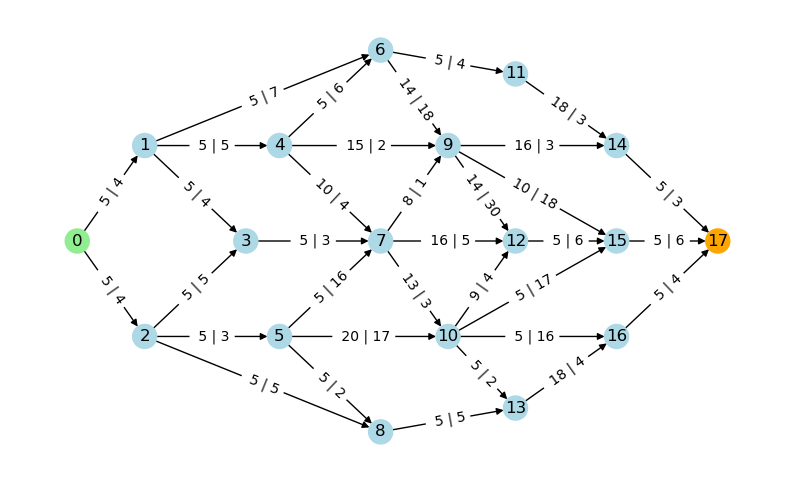

Find the shortest path from 0 to 17, whose highest point is the lowest.
Arrow labels: height|length (=weight)


In [1]:
# ALKUTOIMET
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import random as rnd

%matplotlib inline   
import warnings    
warnings.filterwarnings("ignore", category=UserWarning)

# CREATE A GRAPH
G = nx.DiGraph()
# Nodes:
G.add_nodes_from([
     (0, {"color": "lightgreen",}),
     (1, {"color": "lightblue",}),
     (2, {"color": "lightblue",}),
     (3, {"color": "lightblue",}),
     (4, {"color": "lightblue",}), 
     (5, {"color": "lightblue",}), 
     (6, {"color": "lightblue",}),
     (7, {"color": "lightblue",}),
     (8, {"color": "lightblue",}),
     (9, {"color": "lightblue",}),
     (10,{"color": "lightblue",}),
     (11,{"color": "lightblue",}),
     (12,{"color": "lightblue",}),
     (13,{"color": "lightblue",}),
     (14,{"color": "lightblue",}),
     (15,{"color": "lightblue",}),
     (16,{"color": "lightblue",}),
     (17,{"color": "orange"   ,}),
     ])
# Node positions
ps = {0:(0, 0),   1:(2, 0.4),   2:(2,-0.4),  3:(5, 0),  4:(6, 0.4), 
      5:(6,-0.4,),  6:(9, 0.8),  7:(9, 0),  8:(9,-0.8), 9:(11,0.4 ),
     10:(11,-0.4 ), 11:(13, 0.7), 12:(13,0 ), 13:(13,-0.7 ),
     14:(16,0.4 ), 15:(16,0 ),  16:(16,-0.4 ), 17:(19,0 )}
# Collect the node colors from dictionary values into a list.
ncols = nx.get_node_attributes(G, 'color').values()  #(-> tulostukseen

# Edges 
# Here the edge "height" represents how high this edge is located and
# edge "weight" represent the distance between two nodes.
G.add_edges_from([
        (0, 1, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (0, 2, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (1, 3, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (1, 4, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (1, 6, {"height": 5, "weight": 7, "color":'k', "width": 1}),
        (2, 3, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (2, 5, {"height": 5, "weight": 3, "color":'k', "width": 1}),
        (2, 8, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (3, 7, {"height": 5, "weight": 3, "color":'k', "width": 1}),
        (4, 6, {"height": 5, "weight": 6, "color":'k', "width": 1}),
        (4, 7, {"height": 10, "weight": 4, "color":'k', "width": 1}),
        (4, 9, {"height": 15, "weight": 2, "color":'k', "width": 1}),
        (5, 7, {"height": 5, "weight":16, "color":'k', "width": 1}),
        (5, 8, {"height": 5, "weight": 2, "color":'k', "width": 1}),
        (5,10, {"height": 20, "weight":17, "color":'k', "width": 1}),
        (6, 9, {"height": 14, "weight":18, "color":'k', "width": 1}),
        (6,11, {"height": 5, "weight": 4, "color":'k', "width": 1}),
        (7, 9, {"height": 8, "weight": 1, "color":'k', "width": 1}),
        (7,10, {"height": 13, "weight": 3, "color":'k', "width": 1}),
        (7,12, {"height": 16, "weight": 5, "color":'k', "width": 1}),
        (8,13, {"height": 5, "weight": 5, "color":'k', "width": 1}),
        (9,12, {"height": 14, "weight":30, "color":'k', "width": 1}),
        (9,14, {"height": 16, "weight": 3, "color":'k', "width": 1}),
        (9,15, {"height": 10, "weight":18, "color":'k', "width": 1}),
        (10,12,{"height": 9, "weight": 4, "color":'k', "width": 1}),
        (10,13,{"height": 5, "weight": 2, "color":'k', "width": 1}),
        (10,15,{"height": 5, "weight":17, "color":'k', "width": 1 }),
        (10,16,{"height": 5, "weight":16, "color":'k', "width": 1 }),
        (11,14,{"height": 18, "weight": 3, "color":'k', "width": 1 }),
        (12,15,{"height": 5, "weight": 6, "color":'k', "width": 1 }),
        (13,16,{"height": 18, "weight": 4, "color":'k', "width": 1 }),
        (14,17,{"height": 5, "weight": 3, "color":'k', "width": 1 }),
        (15,17,{"height": 5, "weight": 6, "color":'k', "width": 1 }),
        (16,17,{"height": 5, "weight": 4, "color":'k', "width": 1 }),
    ])

RG = G.copy() # Residual Graph, in which the search for a new path using DFS is performed
              # and  from which the highest edges of the NewPaths will be removed.
             

# DRAW 1. THE INITIAL GRAPH G
# Collect the edge attributes into dictionaries:
edge_height = nx.get_edge_attributes(G,'height')
edge_weight = nx.get_edge_attributes(G,'weight')        # "Distance between the nodes"
ecols = nx.get_edge_attributes(G, 'color').values()
widths = nx.get_edge_attributes(G, 'width').values()    #  Edge width

# Draw  the graph:
plt.rcParams["figure.figsize"] = [10, 6]   
nx.draw_networkx(G,
        pos=ps,                     # Nodepositions
        node_color=ncols,   
        font_color= 'k',            # For nodes
        edge_color=ecols,
        with_labels=True,)          # Visible node labels

# Draw the edge labels
# Create edge labels as a dictionary 'elabs', where the key is the edge and
# its value is the height combined with the weight (=lenght) of the edge:
elabs = dict([((u,v), f' {edge_height[u,v]} | {edge_weight[u,v]}')\
             for u,v in G.edges])  
#OR: elabs = dict([((u,v), f' {edge_height[u,v]}')  for u,v in G.edges]) 
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs) 

plt.axis("off")                                        
plt.show()
print('Find the shortest path from 0 to 17, whose highest point is the lowest.' )
print('Arrow labels: height|length (=weight)')

                           hight | lenght


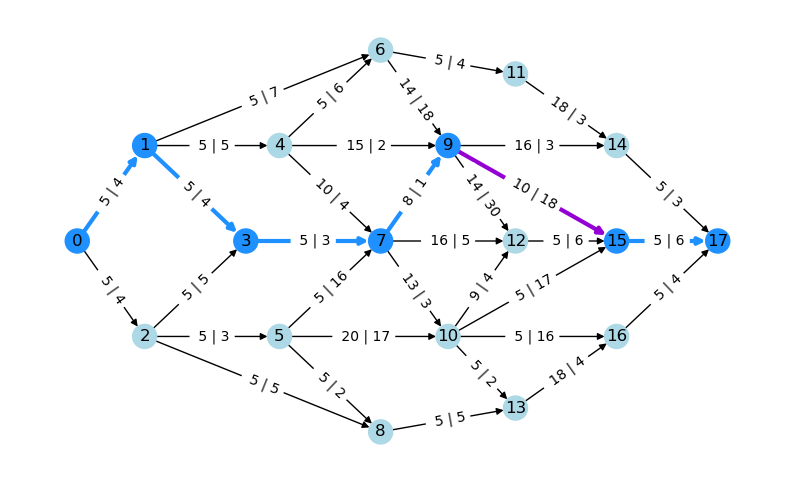

       The highest point of the path is 10 and the lenght of the path 36


In [2]:
# ALGORITHM for the path whose highest point is lowest  (i.e. the lowest threshold)
# and which, moreover, is the shortest of the same pass hight.
# We we make use of NetworkX functions 'shortest_path()' and 'shortest_path_length()'.

pth_hi0 = 999 # The initial value for the height of the highest edge of the final path.    

while nx.has_path(RG, 0, 17)  == True:     # As long as there are paths from 0 to 17:
    pth = nx.shortest_path(RG, source=0, target=17, weight='weight')   # NewPath (Dijkstra)
    pth_edges =(list(nx.utils.pairwise(pth)))       
    pth_len = nx.shortest_path_length(RG, source= 0, target= 17, weight= 'weight')
    pth_hi = 0                    # The initial setting for the highest e dge of the NewPath hight
    # Finding the highest edge of the NewPath:
    for u,v in pth_edges:                  # Runs through the edges of the NewPath
        if edge_height[u,v] > pth_hi: 
            pth_hi = edge_height[u,v]      # Upgrade of the highest edge of the NewPath
            u1 = u                         # The nodes of the current highest edge of the NewPath
            v1 = v
    RG.remove_edge(u1,v1)               # Remove the highest edge of this path from the graph RG       

    # Update BestPath if this NewPath 'pth' has lower threshold than the current BestPath 'path0':
    if pth_hi < pth_hi0:                  # If the new path has a lower threshold:
        path0 = pth                       # BestPath update
        pth_edg0 =(list(nx.utils.pairwise(path0)))  # BestPath edges as a list
        u0 = u1                           # The nodes of the highest edge of the BestPath
        v0 = v1
        pth_hi0 = pth_hi                  # Update the hight of the highest edge of the BestPath
        path_len0 = pth_len               # The lenght of the BestPath

# When the network's BestPath has been found, its highest edge is returned to the Residual Graph,
# from which the search algorithm ('while loop') had removed it:
RG.add_edge(u0, v0)  
#print('BestPath:', path0)       
#print('The lenght of the BestPath:', path_len0) 

# DRAW 2. SOLUTION GRAPHG G 
# The edges of the solution path are colored blue and widened  
for u, v in G.edges:
    if (u, v) in pth_edg0:
        G.edges[(u,v)]['color']= 'dodgerblue'
        G.edges[(u,v)]['width']= 3
G.edges[(u0,v0)]['color']= 'darkviolet'                    # The highest pass to cross
ecols = nx.get_edge_attributes(G, 'color').values()        # Update the colors in G
widths = list(nx.get_edge_attributes(G, 'width').values()) 

# The nodes of the solution path ('path0') are colored 'dodgerblue'
for n in G.nodes:
    if n in path0:
        G.nodes[n]['color']= 'dodgerblue'
ncols = nx.get_node_attributes(G, 'color').values()      

# Both hight and lenght in the label
plt.rcParams["figure.figsize"] = [10, 6]    
print('                           hight | lenght')
nx.draw_networkx(G,
        pos=ps,                           # Nodepositions
        node_color = ncols,   
        font_color = 'k',                 # For nodes
        edge_color = ecols,
        width = widths,                   # For edges
        with_labels = True,)              # Visible node labels

#Create edge labels as a dictionary 'elabs', where the key is the edge and
# its value is the height combined with the weight of this edge:
elabs = dict([((u,v), f' {edge_height[u,v]} | {edge_weight[u,v]}')\
             for u,v in G.edges])     
# Add the edge labels to the drawing 
nx.draw_networkx_edge_labels(G, pos=ps, edge_labels = elabs) 
plt.axis("off")                           # No frames around the picture                            
plt.show()
print('       The highest point of the path is', pth_hi0, 'and the lenght of the path', path_len0)

          Residual Graph with edge hights


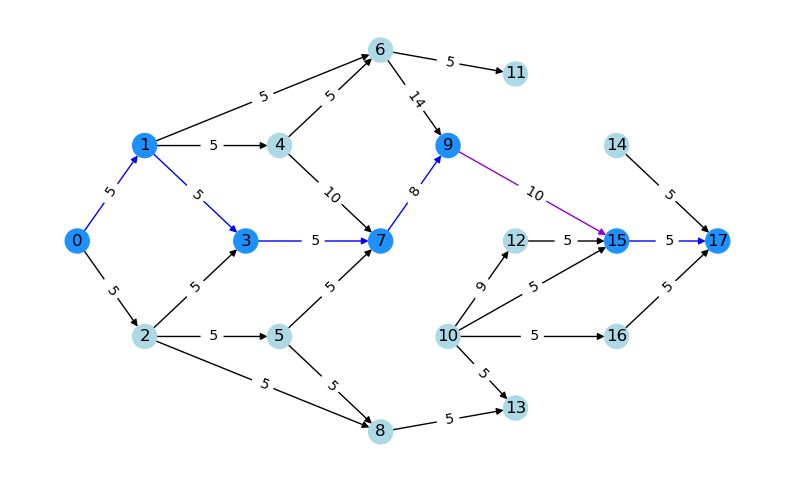

In [3]:
# DRAW 3.  THE RESIDUAL GRAPH RG
# In graph RG, the edges of the solution path are colored blue:
for u, v in RG.edges:
    if (u, v) in pth_edg0:
        RG.edges[(u,v)]['color']= 'blue'
RG.edges[(u0,v0)]['color']= 'darkviolet'             # The highest edge of the solution path
ecols = nx.get_edge_attributes(RG, 'color').values()

# Draw the Residual Graph RG
plt.rcParams["figure.figsize"] = [10, 6]       
print('          Residual Graph with edge hights')
nx.draw_networkx(RG,
        pos=ps,             # Nodepositions
        node_color=ncols,   
        font_color= 'k',    # For nodes
        edge_color= ecols,
        with_labels=True,)

#Create edge labels as a dictionary 'elabs', where the key is the edge and
# its value is the height:
elabs = (dict([((u,v), f' {edge_height[u,v]}')  for u,v in RG.edges]))  
nx.draw_networkx_edge_labels(RG, pos=ps, edge_labels = elabs)  # Draw the edge labels
plt.axis("off")                                         
plt.show()